# APS1070
#### Project 1 --- Basic Principles and Models
**Deadline: Feb 1st, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: 
Student ID:

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 1 [10 Marks]
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with the [bodyfat dataset](https://www.openml.org/search?type=data&sort=runs&id=560&status=active). The dataset lists estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for a number of individuals.


Download it using the cell below:

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
dataset = fetch_openml(name='bodyfat', version=1, parser="auto")

## Part 1: Getting started [2.5 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**

* How many features do we have in this dataset? 14
* Determine the median target value. 19.2
* How many participants have a target value greater than the median target value? 125


The percentage of body fat for an individual can be estimated once body density has been determined. Thus, for this project, we'll disregard the `Density` feature to make the body fat percentage prediction more challenging. In this case, you need to delete the `Density` column from the dataset.

Now add an additional column containing either 0 (if the target value is below the median) or 1 (if the target value is above the median). This will be the new target value to classify the data as the individuals with a body fat percentage below median or the individuals with a body fat percentage above median. **[0.5]**

In [2]:
data = dataset.data
target = dataset.target
feature_names = dataset.feature_names

# Print some information
print("Feature Matrix (data):")
print(data.head())

print("\nTarget Variable:")
print(target.head())

print("\nFeature Names:")
print(feature_names)

# Create a Pandas DataFrame with feature names as column headings

import pandas as pd

df = pd.DataFrame(data, columns=feature_names)
df['target'] = target  # Adding the target variable as a new column

# Print the first few rows of the DataFrame for inspection
print("\nDataFrame (df):")
df.head()


Feature Matrix (data):
   Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1   1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2   1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3   1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4   1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  

Target Variable:
0    12.3
1     6.1
2    25.3
3    10.4
4    28.7
Name: class, dtype: float64

Feature Names:
['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']

DataFrame (df):


,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7


In [3]:
'''
How many features do we have in this dataset? 14
Determine the median target value. 19.2
How many participants have a target value greater
than the median target value? 125

'''

# 1. How many features do we have in this dataset?
num_features = len(feature_names)
print("\nNumber of features:", num_features)

# 2. Determine the median target value.
median_target = df['target'].median()
print("Median target value:", median_target)

# 3. How many participants have a target value greater than the median?
participants_above_median = df[df['target'] > median_target]
num_participants_above_median = len(participants_above_median)
print("Number of participants with target value above the median:",
      num_participants_above_median)


Number of features: 14
Median target value: 19.2
Number of participants with target value above the median: 125


In [4]:
'''
The percentage of body fat for an individual can be estimated once body
density has been determined. Thus, for this project, we'll disregard the
Density feature to make the body fat percentage prediction more challenging.
In this case, you need to delete the Density column from the dataset.

'''

# Remove the 'Density' column
df = df.drop(columns=['Density'])

# Print the first few rows of the DataFrame after removing 'Density' column
print("\nDataFrame (df) after removing 'Density' column:")
df.head()



DataFrame (df) after removing 'Density' column:


,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,target
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7


In [23]:
'''
Now add an additional column containing either 0 (if the target value is below
the median) or 1 (if the target value is above the median). This will be the
new target value to classify the data as the individuals with a body fat
percentage below median or the individuals with a body fat percentage
above median. [0.5]

-------------------------------------------------------------------------

Note: There could be some values that are equal to median.
In this case they will be assigned to 0 because I am checking for values that
greater than median.

'''

# Calculate the median target value
median_target = df['target'].median()

# Add a new column "Target_Class" with values 0 or 1 based on the median
# "Target_Class" is the new target

df['Target_Class'] = (df['target'] > median_target).astype(int)

# Print the first few rows of the DataFrame for inspection
print("DataFrame (df) with new 'Target_Class' column:")
print(df.head())



DataFrame (df) with new 'Target_Class' column:
   Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  \
0   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   21.9   
1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   23.4   
2   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   24.0   
3   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   22.8   
4   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   24.0   

   Biceps  Forearm  Wrist  target  Target_Class  
0    32.0     27.4   17.1    12.3             0  
1    30.5     28.9   18.2     6.1             0  
2    28.8     25.2   16.6    25.3             1  
3    32.4     29.4   18.2    10.4             0  
4    32.2     27.7   17.7    28.7             1  


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.)

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [6]:
### YOUR CODE HERE ###

from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)

# Features excluding 'target' and 'Target_Class'
X = df.drop(columns=['target', 'Target_Class'])
y = df['Target_Class']  # Target variable

# Split the dataset into a train and a test set (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

#Print the shape of the train and test sets

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (176, 13)
Shape of X_test: (76, 13)
Shape of y_train: (176,)
Shape of y_test: (76,)


### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is the *Chest circumference (cm)* i.e. ``Chest``, the y-axis is the *Wrist circumference (cm)* i.e. ``Wrist``, and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but standardize the two features. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




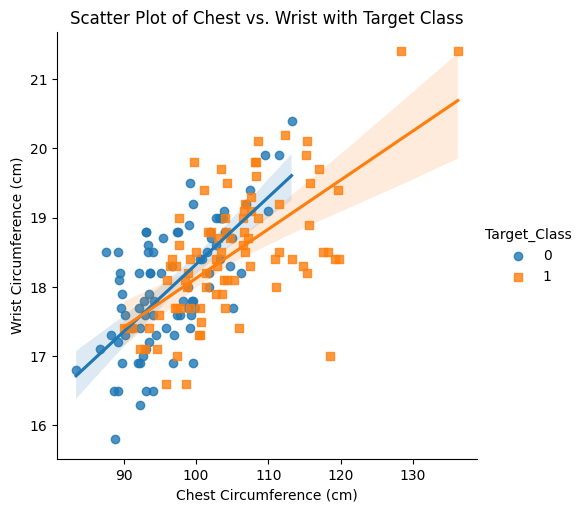

In [7]:
### YOUR CODE HERE ###
'''
Use seaborn.lmplot (help here) to visualize a few features of the training set.
Draw a plot where the x-axis is the Chest circumference (cm) i.e. Chest, the
y-axis is the Wrist circumference (cm) i.e. Wrist, and the color of each
datapoint indicates its class. [0.5]
------------------------------------------------------------------------
'''
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the training features and target class into a DataFrame for plotting
train_data = X_train.copy()
train_data['Target_Class'] = y_train #useful for color

# Use seaborn.lmplot to create the scatter plot
sns.lmplot(x='Chest', y='Wrist', hue='Target_Class', data=train_data,
           markers=["o", "s"])

# Set plot labels and title
plt.xlabel('Chest Circumference (cm)')
plt.ylabel('Wrist Circumference (cm)')
plt.title('Scatter Plot of Chest vs. Wrist with Target Class')

plt.show()



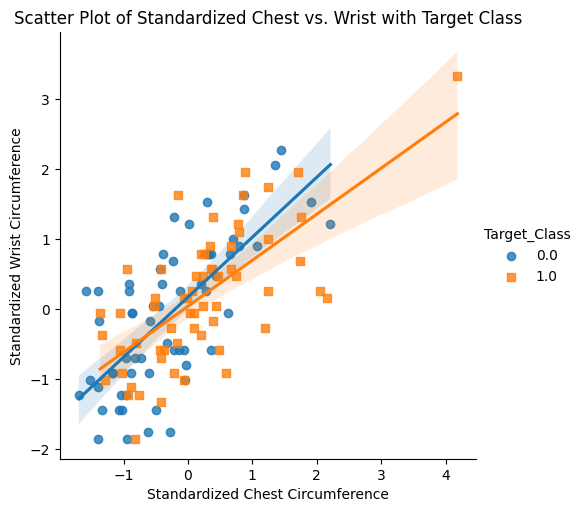

In [8]:
'''
Standardizing the data is often critical in machine learning. Show a
plot as above, but standardize the two features.
'''

from sklearn.preprocessing import StandardScaler

# Standardize the training features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)

train_data_standardized = pd.DataFrame(X_train_standardized,
                                       columns=X_train.columns)

train_data_standardized['Target_Class'] = y_train

sns.lmplot(x='Chest', y='Wrist', hue='Target_Class',
           data=train_data_standardized, markers=["o", "s"])

plt.xlabel('Standardized Chest Circumference')
plt.ylabel('Standardized Wrist Circumference')
plt.title('Scatter Plot of Standardized Chest vs. Wrist with Target Class')

# Show the plot
plt.show()

In [ ]:
'''
What's different? why do they look similar? Based on your observation,
what is the advantage of standardization? [0.6]
------------------------------------------------------------------------
Abdullah:

Ans:

The main difference between the two plots is in the scale of the axes.
In the first plot, where the data is not standardized, the axes represent the
original values of Chest and Wrist circumferences in centimeters.

In the second plot, where the data is standardized, the axes represent
the z-scores of Chest and Wrist circumferences after standardization.

The reason the plots look similar after standardization is because the
relationship between the two variables (Chest and Wrist circumferences)
remains the same, despite the change in scale.

They look similar because standardization doesn't change the shape or
distribution of the data; it only scales the values.

Standardization is advantageous because it brings all features
to a common scale, which is particularly important for machine learning
algorithms that rely on distance measures
(as we studied about k-nearest neighbors).

Standardization ensures that each feature contributes
equally to the analysis, preventing features with larger scales from dominating
the learning process.

'''

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether an individual has a body fat percentage that is less than the median or greater than the median.

Follow these steps:

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




----------------------------------------------------------

Results for the Best k:
Best k: 19
Mean Training Accuracy: 0.7514
Mean Validation Accuracy: 0.7389

----------------------------------------------------------



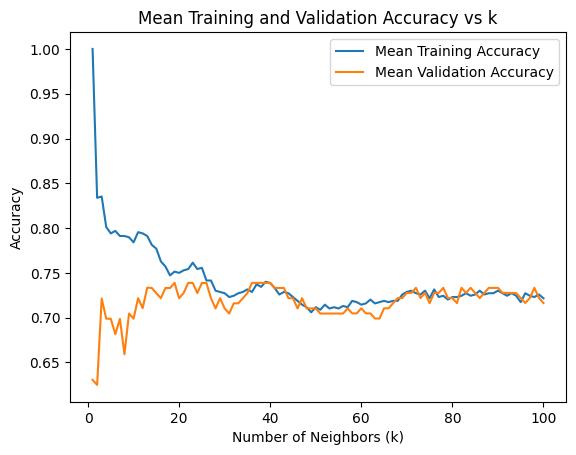

In [10]:
### YOUR CODE HERE ###

'''
1. Train a KNN Classifier using cross-validation on the dataset.
Sweep k (number of neighbours) from 1 to 100, and show a plot of the mean
cross-validation accuracy vs k. [1]



'''

from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


# Initialize a KNN Classifier
knn_classifier = KNeighborsClassifier()

# Sweep k values from 1 to 100
k_values = np.arange(1, 101)
mean_train_accuracies = []
mean_validation_accuracies = []

# Perform cross-validation for each k
for k in k_values:
    knn_classifier.n_neighbors = k
    scores = cross_validate(knn_classifier, X_train, y_train, cv=5,
                            return_train_score=True)

    # Calculate mean training and validation accuracies
    mean_train_accuracy = np.mean(scores['train_score'])
    mean_validation_accuracy = np.mean(scores['test_score'])

    mean_train_accuracies.append(mean_train_accuracy)
    mean_validation_accuracies.append(mean_validation_accuracy)

# Find the best k and its corresponding mean validation accuracy

best_k_index = np.argmax(mean_validation_accuracies)
best_k = k_values[best_k_index]
best_validation_accuracy = mean_validation_accuracies[best_k_index]


# 2. What is the best k? What is the highest cross-validation accuracy? [0.5]

# Print results
print("\n----------------------------------------------------------")
print("\nResults for the Best k:")
print(f"Best k: {best_k}")
print(f"Mean Training Accuracy: {mean_train_accuracies[best_k_index]:.4f}")
print(f"Mean Validation Accuracy: {best_validation_accuracy:.4f}")
print("\n----------------------------------------------------------\n")

# Plot mean training and validation accuracy vs k

plt.plot(k_values, mean_train_accuracies,
         label='Mean Training Accuracy')

plt.plot(k_values, mean_validation_accuracies,
         label='Mean Validation Accuracy')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Mean Training and Validation Accuracy vs k')
plt.legend()
plt.show()

In [ ]:
'''
3. Comment on which ranges of k lead to underfitted or overfitted models
(hint: compare training and validation curves!). [0.5]
------------------------------------------------------------------------
Abdullah:

For this part. I find the difference between mean training and mean
validation accuracries.

Overfitting (small k=1 to k ~ 16):
For k values in this range, the mean training accuracy is significantly higher
than the mean validation accuracy, indicating potential overfitting.

(k~16 to k ~40):
In the range of k values from approximately 16 to 40, both mean training and
mean validation accuracies are relatively high and close to each other.

(k>40):
For larger k values, the mean training accuracy and mean validation accucary
start to stabilize or slightly decrease.

'''

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy.
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!.

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2.
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7).

7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y axis) vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order.
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

def Feature_selector(X_train, y_train, tr=0.95):

    num_features = X_train.shape[1]
    remaining_features = list(range(num_features))
    removed_features = []
    removed_features_names = []
    best_cv_scores = []
    best_k_values_list = []

    # best k and cv score for all the features.
    best_k_full, best_cv_score_full = find_best_k(X_train, y_train)

    # Store the best mean cross-validation score and corresponding k
    best_cv_scores.append(best_cv_score_full)
    best_k_values_list.append(best_k_full)

    #creating a copy so we don't original X_train
    X_train_copy = X_train.copy()

    while len(remaining_features) > 1:
        # Fit a decision tree on the training set
        dt_classifier = DecisionTreeClassifier(random_state=0)
        dt_classifier.fit(X_train_copy, y_train)

        feature_importances = dt_classifier.feature_importances_
        least_important_feature = np.argmin(feature_importances)

        removed_features.append(remaining_features.pop(least_important_feature))
        removed_features_names.append(X_train_copy.columns[least_important_feature])

        X_train_copy = X_train_copy.drop(columns=X_train_copy.columns[least_important_feature])

        best_k, best_cv_score = find_best_k(X_train_copy, y_train)

        #print(X_train_copy.columns)

        # Store the best mean cross-validation score and corresponding k
        best_cv_scores.append(best_cv_score)
        best_k_values_list.append(best_k)

        if best_cv_score < tr * best_cv_score_full:
            break

    return removed_features, removed_features_names, best_cv_scores, best_k_values_list

def find_best_k(X, y):
    k_values = list(range(1, 101))
    best_k = None
    best_cv_score = 0

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        cv_scores = cross_val_score(knn, X, y, cv=5)
        mean_cv_score = np.mean(cv_scores)

        if mean_cv_score > best_cv_score:
            best_cv_score = mean_cv_score
            best_k = k

    return best_k, best_cv_score


removed_features, removed_features_names, best_cv_scores,best_k_values = Feature_selector(X_train, y_train)

print("Removed Features:", removed_features)
print("Removed Features Names:", removed_features_names)
print("Best CV Scores:", best_cv_scores)
print("Best k Values:", best_k_values)

Removed Features: [6, 0, 9, 3, 10, 2, 11, 12, 7, 4, 8, 1]
Removed Features Names: ['Hip', 'Age', 'Ankle', 'Neck', 'Biceps', 'Height', 'Forearm', 'Wrist', 'Thigh', 'Chest', 'Knee', 'Weight']
Best CV Scores: [0.738888888888889, 0.7500000000000001, 0.7836507936507937, 0.7836507936507935, 0.778095238095238, 0.783968253968254, 0.7841269841269841, 0.7841269841269841, 0.7839682539682539, 0.7671428571428571, 0.7782539682539683, 0.7953968253968255, 0.7898412698412699]
Best k Values: [19, 23, 11, 11, 11, 14, 21, 21, 12, 12, 7, 7, 47]


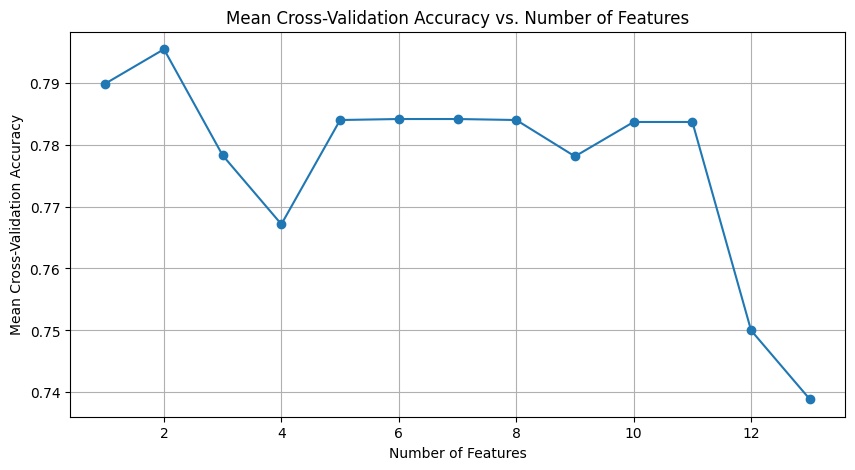

In [13]:
# Calculate the number of remaining features at each step
num_remaining_features = [X_train.shape[1] - i for i in range(len(removed_features)+1)]

# Plot mean cross-validation accuracy vs. the number of features
plt.figure(figsize=(10, 5))
plt.plot(num_remaining_features, best_cv_scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Mean Cross-Validation Accuracy vs. Number of Features')
plt.grid()
plt.show()

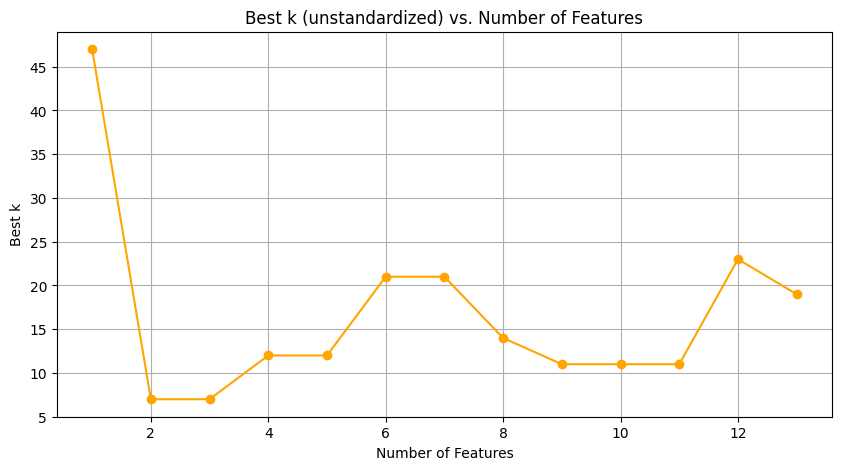

In [14]:
# Calculate the number of remaining features at each step
num_remaining_features = [X_train.shape[1] - i for i in range(len(removed_features)+1)]


# Plot the best value of k vs. the number of features
plt.figure(figsize=(10, 5))
plt.plot(num_remaining_features, best_k_values, marker='o', color='orange')
plt.xlabel('Number of Features')
plt.ylabel('Best k')
plt.title('Best k (unstandardized) vs. Number of Features')
plt.grid()
plt.show()

In [ ]:
'''
State what is the number of essential features for
classification and justify your answer. [1]


Abdullah:

By observing mean_validation_accuracy VS no. of features plot:

The highest cross-validation accuracy is achieved when using only two features.
This implies that, for the given task, 2 is identified as the essential
number of features.



There is a region of more stabilized accuracies when the number of
features ranges from 5 to 8.

This suggests that within this range, the model's performance remains
relatively consistent, possibly indicating a subset of features that
contributes consistently to accurate classification.



'''

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one.

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html))

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%.
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


Removed Features (standardized): [6, 0, 9, 3, 10, 2, 11, 12, 7, 4, 8, 1]
Removed Features Names (standardized): ['Hip', 'Age', 'Ankle', 'Neck', 'Biceps', 'Height', 'Forearm', 'Wrist', 'Thigh', 'Chest', 'Knee', 'Weight']
Best CV Scores (standardized): [0.756031746031746, 0.7561904761904763, 0.7558730158730158, 0.7501587301587301, 0.7503174603174603, 0.7503174603174603, 0.7841269841269842, 0.7785714285714287, 0.7725396825396826, 0.7842857142857144, 0.7957142857142857, 0.8069841269841269, 0.7898412698412699]
Best k Values (standardized): [30, 13, 17, 13, 57, 47, 9, 25, 26, 16, 22, 35, 47]


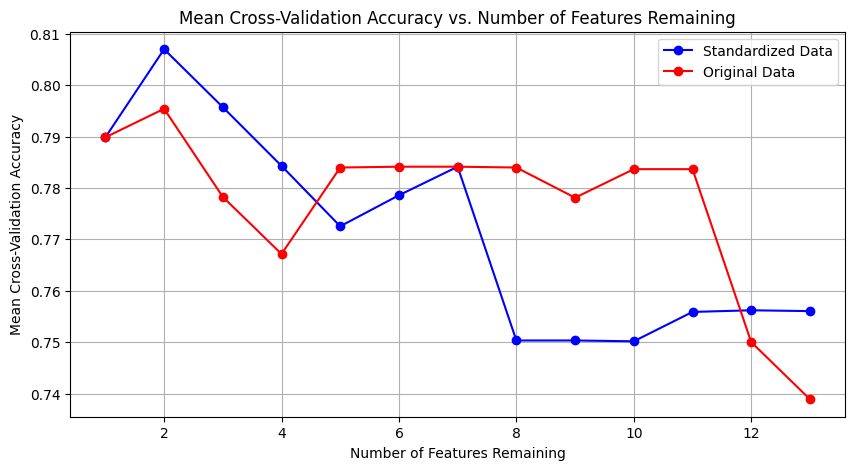

In [16]:
### YOUR CODE HERE ###

from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize the training data
scaler = StandardScaler()
X_train_standardized = pd.DataFrame(scaler.fit_transform(X_train),
                                    columns=X_train.columns)

X_test_standardized = pd.DataFrame(scaler.transform(X_test),
                                   columns=X_train.columns)

removed_features_standardized, removed_features_names_standardized,best_cv_scores_standardized, best_k_values_standardized = Feature_selector(X_train_standardized, y_train)


num_features_remaining_standardized = [X_train_standardized.shape[1] - i for i in range(len(removed_features_standardized)+1)]
num_remaining_features = [X_train.shape[1] - i for i in range(len(removed_features)+1)]


print("Removed Features (standardized):", removed_features_standardized)
print("Removed Features Names (standardized):", removed_features_names_standardized)
print("Best CV Scores (standardized):", best_cv_scores_standardized)
print("Best k Values (standardized):", best_k_values_standardized)

# Plot mean cross-validation accuracy vs the number of features for both standardized and original data
plt.figure(figsize=(10, 5))
plt.plot(num_features_remaining_standardized, best_cv_scores_standardized, marker='o', linestyle='-', color='b', label='Standardized Data')
plt.plot(num_remaining_features, best_cv_scores, marker='o', linestyle='-', color='r', label='Original Data')
plt.xlabel('Number of Features Remaining')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.title('Mean Cross-Validation Accuracy vs. Number of Features Remaining')
plt.legend()
plt.grid(True)
plt.show()


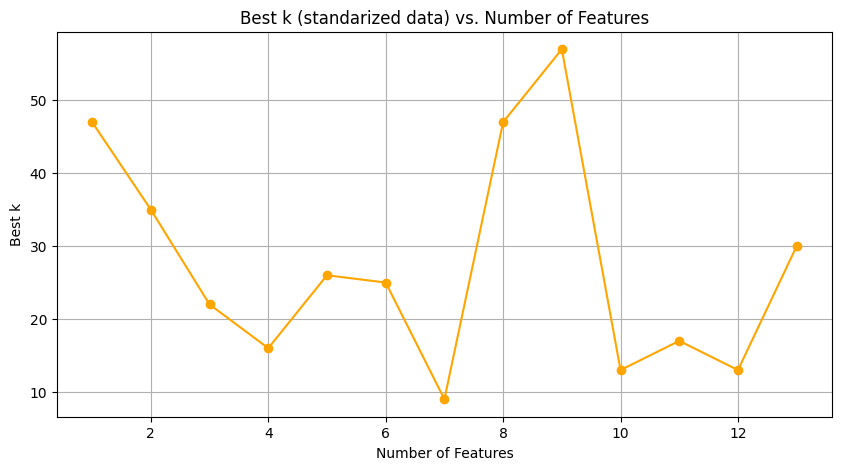

In [17]:
# Calculate the number of remaining features at each step
num_remaining_features = [X_train.shape[1] - i for i in range(len(removed_features)+1)]


# Plot the best value of k vs. the number of features
plt.figure(figsize=(10, 5))
plt.plot(num_remaining_features, best_k_values_standardized, marker='o', color='orange')
plt.xlabel('Number of Features')
plt.ylabel('Best k')
plt.title('Best k (standarized data) vs. Number of Features')
plt.grid()
plt.show()

In [ ]:
'''
Discuss how standardization (helped/hurt) your model and its performance?
Discuss which cases lead to a higher cross validation accuracy
(how many features? which features? What K?)
------------------------------------------------------------------------


Abdullah:

number of features (1 - 4):
Standardization seems to have helped the model in this case,
as indicated by the higher cross-validation accuracy values in the
best_cv_scores_standardized compared to best_cv_scores.

number of features (4 - 12):
Within this range, the standardization hurt the model as the accuracy stays
below than the unstandarized data.

In both cases (standardized and original data),
the models achieved the highest cross-validation accuracy with fewer features,
indicating that feature selection is beneficial for model performance.
Notably, the highest accuracies are achieved when the number of features is 2

Discuss which cases lead to a higher cross validation accuracy
(how many features? which features? What K?)

Unstandardized Data:
- 2 features
- k = 35
- Features = ['Weight', 'Abdomen']

standardized Data:
- 2 features
- k = 7
- Features = ['Weight', 'Abdomen']

'''

## Part 5: Decision Tree Classifier [1 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features.


In [19]:
### YOUR CODE HERE ###
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

#Initial hyperparameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20]
}

# grid search with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_standardized, y_train)

# Get the best hyperparameters
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples_split = grid_search.best_params_['min_samples_split']

# Train the decision tree with the best hyperparameters on the entire training set
best_dt_classifier = DecisionTreeClassifier(max_depth=best_max_depth,
                                            min_samples_split=best_min_samples_split, random_state=0)

best_dt_classifier.fit(X_train_standardized, y_train)

# Evaluate decision tree performance using cross-validation
dt_cv_scores = cross_val_score(best_dt_classifier, X_train_standardized, y_train, cv=5)

print("Decision Tree Cross-Validation Accuracy:", np.mean(dt_cv_scores))

#  compare with KNN

# Train the best KNN classifier on the entire training set
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train_standardized, y_train)

# Evaluate KNN performance using cross-validation
knn_cv_scores = cross_val_score(best_knn_classifier,
                                X_train_standardized, y_train, cv=5)

print("KNN Cross-Validation Accuracy:", np.mean(knn_cv_scores))

print("Best Max depth after grid search" , best_max_depth)
# The maximum depth of the tree.
# If None, then nodes are expanded until all leaves are pure or until
# all leaves contain less than min_samples_split samples (sklearn docs)

print("Best Min samples split after grid search" , best_min_samples_split)



Decision Tree Cross-Validation Accuracy: 0.7155555555555555
KNN Cross-Validation Accuracy: 0.7328571428571429
Best Max depth after grid search None
Best Min samples split after grid search 2


## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [20]:
### YOUR CODE HERE ###
'''
The high CV was obtained when dataset was standardized.
No of features = 2
k = 35 (from the plot and best_k_values_standardized list)
Feature names = ['Weight', 'Abdomen']

Since it was for the standarized data, we will use the
the test data that was transform using standard scaler.

'''

X_train_standardized = pd.DataFrame(scaler.fit_transform(X_train),
                                    columns=X_train.columns)

X_test_standardized = pd.DataFrame(scaler.transform(X_test),
                                   columns=X_train.columns)


X_train_standardized_two_features = X_train_standardized[['Weight', 'Abdomen']]
X_test_standardized_two_features = X_test_standardized[['Weight', 'Abdomen']]

predict_knn_classifier = KNeighborsClassifier(n_neighbors=35)
predict_knn_classifier.fit(X_train_standardized_two_features, y_train)
y_pred = predict_knn_classifier.predict(X_test_standardized_two_features)

In [21]:
from sklearn.metrics import accuracy_score, precision_score
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")




Accuracy: 0.8421
Precision: 0.8459


In [ ]:
'''
An accuracy of 84.21% (using only two features) and precision of 84.59%
indicate that the model  performs well on the test set. It correctly classifies
instances with a high overall accuracy, and the precision indicates that
when it predicts a class, it is often correct

'''

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/